In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords,latlon_coords, smooth2d,get_cartopy, cartopy_xlim, cartopy_ylim
import pandas as pd
import csv

In [9]:
#open the Csv, read it
x = open("Crouch_02Z_Sounding.csv", "r")

#Deliminate it with commas to grab the observed values
data = csv.reader(x, delimiter =",")
pres_list = []
temp_list = []
dew_list = []
ct = 0
for line in data:
    if p > 280:
        ct = 1 + ct
        p = float(line[1])
        print(line[1])
        t = float(line[2])
        dew = float(line[3])
        pres_list.append(p)
        temp_list.append(t)
        dew_list.append(dew)


#opening at 11 Z for the Boise, Balloon launch
name = "wrfout_d01_2017-01-08_02:00:00"
ncfile = Dataset(name)
temp = getvar(ncfile, "tc")
p = getvar(ncfile, "pressure")
temp = interplevel(temp, p, 500)
lon = getvar(ncfile, "lon", meta = False)
lat = getvar(ncfile, "lat", meta = False)

x = 100
y = 200

lons = lon[x,y]
lats = lat[x,y]

print("Lon")
print(lons)
print("lats")
print(lats)


    
    
    
    
    
    


FileNotFoundError: [Errno 2] No such file or directory: b'wrfout_d01_2017-01-08_11:00:00'

In [ ]:
#opening at 11 Z for the Boise, Balloon launch
name = "wrfout_d01_2017-01-08_02:00:00"
ncfile = Dataset(name)
lon = getvar(ncfile, "lon", meta = False)
lat = getvar(ncfile, "lat", meta = False)

x = 318
y = 406

lons = lon[x,y]
lats = lat[x,y]

print("Lon")
print(lons)
print("lats")
print(lats)
#Crouch x = 318, y = 406

In [ ]:
#Increase X, Lat Increase, Decrease X, Lat Decrease
x = 247
#Increase Y, Lon Decrease, Decrease Y, Lon Increase
y = 385

#x = 247 y = 385
temp =  getvar(ncfile, "temp", units = "degC", meta = False)
m_list = []

for x in pres_list:
    T_Interp = interplevel(temp, p, x)
    try:
        m_list.append(float(T_Interp[247,385]))
    except:
        z = 0




In [4]:
print(len(pres_list))

1815


In [124]:
copy_m_list = m_list
import math
#copy_m_list.remove('nan')
var = math.isnan(copy_m_list[4592])
final_model_temp = []
for z in copy_m_list:
    var = math.isnan(z)
    if var == False:
        final_model_temp.append(z)
        
temp_list_final = []
for z in temp_list:
    var = math.isnan(z)
    if var == False:
        temp_list_final.append(z)
print(len((final_model_temp)))
temp_list_final = temp_list[0:3191]

difference = np.array(final_model_temp) - np.array(temp_list_final)



3191


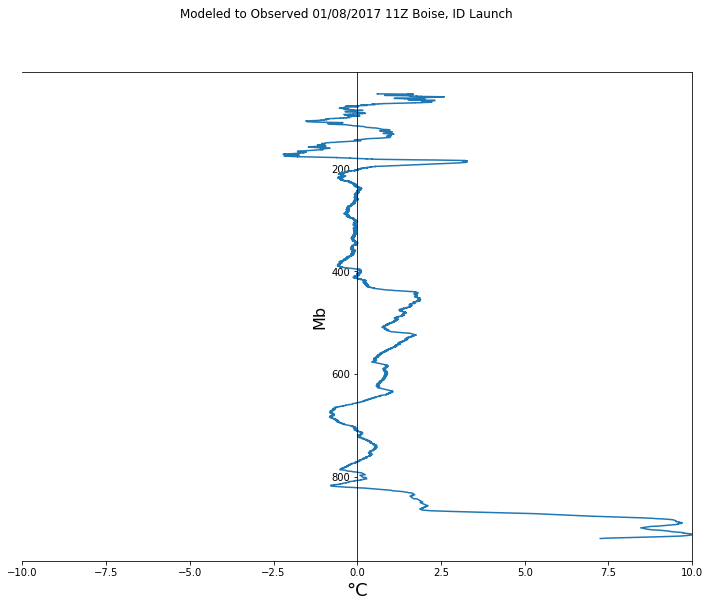

In [142]:
import matplotlib.pyplot as plt
import numpy as np

py = np.array(pres_list[0:3191])
fig = plt.figure(figsize=(12,9))
ax = plt.gca()
ax.spines['left'].set_position('zero')

plt.gca().invert_yaxis()
plt.suptitle('Modeled to Observed 01/08/2017 11Z Boise, ID Launch', fontsize=12)
plt.xlabel('°C', fontsize=18)
plt.ylabel('Mb', fontsize=16)
plt.xlim([-10,10])
plt.plot(difference, py)
plt.show()
fig.savefig("Modeled_Obs_Boise_Sounding_0108201711Z.png")

In [140]:
#Increase X, Lat Increase, Decrease X, Lat Decrease
x = 247
#Increase Y, Lon Decrease, Decrease Y, Lon Increase
y = 385

lons = lon[x,y]
lats = lat[x,y]

print("Lon")
print(lons)
print("lats")
print(lats)

Lon
-116.21881
lats
43.56854


In [ ]:
#The end point on the right is 44 deg 12 N and 115 deg 02W
#The start point on the left is 44 deg 12N and 116 deg 24W

In [8]:
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units

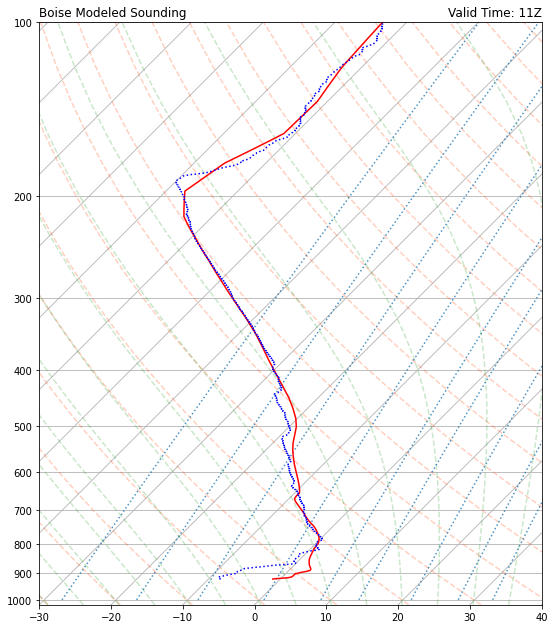

In [155]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(np.array(pres_list), np.array(m_list), 'r')
skew.plot(np.array(pres_list), np.array(temp_list), 'b', linestyle ="dotted")
#skew.plot(pres_list, Td, 'g')
#skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(p=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

# Add some descriptive titles
plt.title('Boise Modeled Sounding', loc='left')
plt.title('Valid Time: 11Z', loc='right')

plt.show()
fig.savefig("First_Sounding.png")

In [159]:
#Increase X, Lat Increase, Decrease X, Lat Decrease
x = 247
#Increase Y, Lon Decrease, Decrease Y, Lon Increase
y = 385

#x = 247 y = 385
dew =  getvar(ncfile, "td", units = "degC", meta = False)
u_m = getvar(ncfile, "ua", units = "m s-1", meta = False)
v_m = getvar(ncfile, "va", units = "m s-1", meta = False)
dew_m_list = []
u_m_list = []
v_m_list = []

for x in pres_list:
    D_Interp = interplevel(dew, p, x)
    U_Interp = interplevel(u_m, p, x)
    V_Interp = interplevel(v_m, p, x)
    try:
        dew_m_list.append(float(D_Interp[247,385]))
        u_m_list.append(float(U_Interp[247,385]))
        v_m_list.append(float(V_Interp[247,385]))
    except:
        z = 0

In [ ]:
print(

In [31]:
x = open("Boise_Idaho_Sounding_01_08_11Z.csv", "r")
data = csv.reader(x, delimiter =",")
u_ob = []
v_ob = []
for line in data:
    u_ob.append(float(line[5]))
    v_ob.append(float(line[6]))
u_ob = np.array(u_ob)
v_ob = np.array(v_ob)

FileNotFoundError: [Errno 2] No such file or directory: 'Boise_Idaho_Sounding_01_08_11Z.csv'

In [30]:
u = np.array(u_m_list)
v = np.array(v_m_list)
u_diff = u_ob - u
v_diff = v_ob - v
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(np.array(pres_list), np.array(m_list), 'r')
skew.plot(np.array(pres_list), np.array(temp_list), 'r', linestyle ="dotted")
skew.plot(np.array(pres_list), np.array(dew_m_list), 'g')
skew.plot(np.array(pres_list), np.array(dew_list), 'g', linestyle = "dotted")
#skew.plot(pres_list, Td, 'g')
skew.plot_barbs(pres_list[::50][0:50], u[::50][0:50], v[::50][0:50], y_clip_radius=0.03, length = 4)
skew.plot_barbs(pres_list[::50][0:50], u[::50][0:50], v[::50][0:50], y_clip_radius=0.03, color = "Blue", length = 9)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)
plt.xlabel("°C")
plt.ylabel("hPa")

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(p=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

# Add some descriptive titles
plt.title('Modeled (Solid, Blue Barbs) and Observed (Dotted, Black Barbs)', loc='left', size = 11)
plt.title('Valid Time: 01/08/2017 11Z', loc='right', size = 10)

plt.show()
#fig.savefig("Model_and_Observed_Sounding_08_11Z_Boise.png")

NameError: name 'u_ob' is not defined

In [189]:
print(pres_list[300])

730.3


In [5]:
x = open("Crouch_04Z.csv", "r")

#Deliminate it with commas to grab the observed values
data = csv.reader(x, delimiter =",")
pres_list = []
temp_list = []
dew_list = []
rh_list = []
wsp_list = []
wnd_list = []
ct = 0
for line in data:
    ct = 1 + ct
    p = float(line[5])
    t = float(line[6])
    rh = float(line[7])
    wsp = float(line[8])
    wnd = float(line[9])
    pres_list.append(p)
    temp_list.append(t)
    rh_list.append(rh)
    wsp_list.append(wsp)
    wnd_list.append(wnd)

In [6]:
name = "wrfout_d01_2017-01-08_03:45:00"
ncfile = Dataset(name)
p = getvar(ncfile, "pressure")
dew =  getvar(ncfile, "td", units = "degC", meta = False)
u_m = getvar(ncfile, "ua", units = "m s-1", meta = False)
v_m = getvar(ncfile, "va", units = "m s-1", meta = False)
temp =  getvar(ncfile, "temp", units = "degC", meta = False)
m_list = []
dew_m_list = []
u_m_list = []
v_m_list = []
for x in pres_list:
    T_Interp = interplevel(temp, p, x)
    D_Interp = interplevel(dew, p, x)
    U_Interp = interplevel(u_m, p, x)
    V_Interp = interplevel(v_m, p, x)
    try:
        m_list.append(float(T_Interp[318,406]))
        dew_m_list.append(float(D_Interp[318,406]))
        u_m_list.append(float(U_Interp[318,406]))
        v_m_list.append(float(V_Interp[318,406]))
    except:
        z = 0

In [10]:
wnd_dir = np.array(wnd_list) - 270
u_obs = np.array(wsp_list)*np.cos(np.radians(wnd_dir))
v_obs = np.array(wsp_list)*np.cos(np.radians(wnd_dir))

In [22]:
import math
es = 6.11* np.exp((17.67*np.array(temp_list))/(np.array(temp_list)+243.5))
e = (np.array(rh_list)/100)*es
dewc = (243.5/((17.67/np.log(e/6.112))-1))

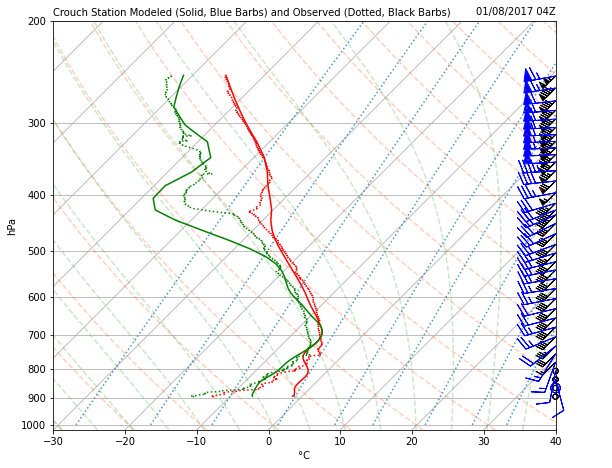

In [35]:
u = np.array(u_m_list)
v = np.array(v_m_list)
#u_diff = u_ob - u
#v_diff = v_ob - v
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(np.array(pres_list), np.array(m_list), 'r')
skew.plot(np.array(pres_list), np.array(temp_list), 'r', linestyle ="dotted")
skew.plot(np.array(pres_list), np.array(dew_m_list), 'g')
skew.plot(np.array(pres_list), np.array(dewc), 'g', linestyle = "dotted")
#skew.plot(pres_list, Td, 'g')
skew.plot_barbs(pres_list[::50][0:50], u_obs[::50][0:50], v_obs[::50][0:50], y_clip_radius=0.03, length = 6)
skew.plot_barbs(pres_list[::50][0:50], u[::50][0:50], v[::50][0:50], y_clip_radius=0.03, color = "Blue", length = 8)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 200)
plt.xlabel("°C")
plt.ylabel("hPa")

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(p=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

# Add some descriptive titles
plt.title('Crouch Station Modeled (Solid, Blue Barbs) and Observed (Dotted, Black Barbs)', loc='left', size = 10)
plt.title('01/08/2017 04Z', loc='right', size = 10)

plt.show()
fig.savefig("1Model_and_Observed_Sounding_08_04Z_Crouch.png")